In [9]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

In [10]:
print("TF version", tf.__version__)
print("Eager Execution", tf.executing_eagerly())

TF version 2.2.0
Eager Execution True


In [15]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                        origin=train_dataset_url,
                                       )
print("Local copy of the dataset file: ", train_dataset_fp)

Local copy of the dataset file:  /home/tornike/.keras/datasets/iris_training.csv


In [20]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [31]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
feature_names = column_names[:-1]
label_name = column_names[-1]


In [34]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size=batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1
)

In [36]:
features, labels = next(iter(train_dataset))
print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6. , 7.2, 6.5, 5.7, 5. , 4.4, 7.2, 6. , 6.4, 6.8, 6.7, 7.3, 6.8,
       5. , 6.8, 6.3, 4.9, 6.6, 6.1, 6.5, 5.7, 5.1, 6.7, 4.9, 6.4, 4.8,
       4.9, 6.1, 7.2, 4.9, 7.7, 6.2], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.7, 3.2, 3. , 4.4, 2. , 3.2, 3. , 2.9, 3.2, 2.8, 3. , 2.9, 3. ,
       3.5, 3.2, 2.7, 3.1, 2.9, 2.6, 3. , 2.9, 3.8, 3.1, 3.1, 3.2, 3. ,
       2.5, 3. , 3.6, 2.4, 2.6, 2.2], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.1, 6. , 5.2, 1.5, 3.5, 1.3, 5.8, 4.5, 4.5, 4.8, 5.2, 6.3, 5.5,
       1.3, 5.9, 4.9, 1.5, 4.6, 5.6, 5.8, 4.2, 1.9, 4.4, 1.5, 5.3, 1.4,
       4.5, 4.9, 6.1, 3.3, 6.9, 4.5], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.6, 1.8, 2. , 0.4, 1. , 0.2, 1.6, 1.5, 1.5, 1.4, 2.3, 1.8, 2.1,
       0.3, 2.3, 1.8, 0.1, 1.3, 1.4, 2.2, 1.3, 0.4, 1.4, 0.1,

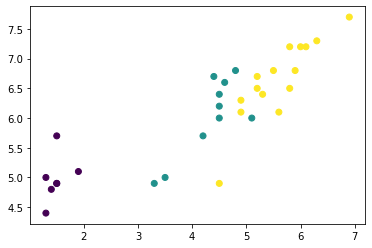

In [42]:
plt.scatter(features['petal_length'], 
            features['sepal_length'],
            c=labels,
            cmap='viridis')
plt.show()

In [48]:
def pack_features_vector(features, labels):
    return tf.stack(list(features.values()), axis=1), labels

pack_features_vector(features, labels)

(<tf.Tensor: shape=(32, 4), dtype=float32, numpy=
 array([[6. , 2.7, 5.1, 1.6],
        [7.2, 3.2, 6. , 1.8],
        [6.5, 3. , 5.2, 2. ],
        [5.7, 4.4, 1.5, 0.4],
        [5. , 2. , 3.5, 1. ],
        [4.4, 3.2, 1.3, 0.2],
        [7.2, 3. , 5.8, 1.6],
        [6. , 2.9, 4.5, 1.5],
        [6.4, 3.2, 4.5, 1.5],
        [6.8, 2.8, 4.8, 1.4],
        [6.7, 3. , 5.2, 2.3],
        [7.3, 2.9, 6.3, 1.8],
        [6.8, 3. , 5.5, 2.1],
        [5. , 3.5, 1.3, 0.3],
        [6.8, 3.2, 5.9, 2.3],
        [6.3, 2.7, 4.9, 1.8],
        [4.9, 3.1, 1.5, 0.1],
        [6.6, 2.9, 4.6, 1.3],
        [6.1, 2.6, 5.6, 1.4],
        [6.5, 3. , 5.8, 2.2],
        [5.7, 2.9, 4.2, 1.3],
        [5.1, 3.8, 1.9, 0.4],
        [6.7, 3.1, 4.4, 1.4],
        [4.9, 3.1, 1.5, 0.1],
        [6.4, 3.2, 5.3, 2.3],
        [4.8, 3. , 1.4, 0.1],
        [4.9, 2.5, 4.5, 1.7],
        [6.1, 3. , 4.9, 1.8],
        [7.2, 3.6, 6.1, 2.5],
        [4.9, 2.4, 3.3, 1. ],
        [7.7, 2.6, 6.9, 2.3],
        [6.2, 2.2, 4

In [49]:
train_dataset = train_dataset.map(pack_features_vector)

In [71]:
features, labels = next(iter(train_dataset))
print(features[:5], labels[:5])

tf.Tensor(
[[4.8 3.  1.4 0.1]
 [5.8 2.7 5.1 1.9]
 [5.  2.3 3.3 1. ]
 [5.7 2.9 4.2 1.3]
 [6.8 3.2 5.9 2.3]], shape=(5, 4), dtype=float32) tf.Tensor([0 2 1 1 2], shape=(5,), dtype=int32)


In [81]:
model = keras.models.Sequential([
    keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    keras.layers.Dense(10, activation=tf.nn.relu,),
    keras.layers.Dense(3)
])

In [83]:
predictions = model(features)

predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 0.9636421 , -1.044702  ,  0.90786994],
       [ 2.3931646 , -1.4787183 ,  1.7375613 ],
       [ 1.665935  , -1.1610669 ,  1.4102316 ],
       [ 2.0304418 , -1.3669324 ,  1.6215563 ],
       [ 2.804746  , -1.7004924 ,  1.9909458 ]], dtype=float32)>

In [84]:
tf.nn.softmax(predictions)

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[0.48077723, 0.06452546, 0.45469728],
       [0.6493726 , 0.01351937, 0.33710802],
       [0.5453866 , 0.03228145, 0.42233187],
       [0.5889797 , 0.01970786, 0.39131242],
       [0.68765306, 0.00759922, 0.30474776],
       [0.507869  , 0.06394568, 0.4281854 ],
       [0.55240256, 0.01331765, 0.4342798 ],
       [0.5555823 , 0.05916836, 0.38524938],
       [0.5839463 , 0.01978344, 0.3962703 ],
       [0.58101463, 0.01069816, 0.40828726],
       [0.6420842 , 0.01374647, 0.34416938],
       [0.5629596 , 0.01332114, 0.42371923],
       [0.53176206, 0.06060243, 0.4076356 ],
       [0.56732106, 0.0120716 , 0.4206074 ],
       [0.5035071 , 0.07135309, 0.42513984],
       [0.49629074, 0.0783752 , 0.4253341 ],
       [0.5130219 , 0.06589003, 0.42108804],
       [0.56376636, 0.01952354, 0.41671014],
       [0.6355478 , 0.01007467, 0.35437754],
       [0.49470508, 0.07014918, 0.43514574],
       [0.6493726 , 0.01351937, 0.33710802],
      

In [91]:
print(tf.argmax(predictions, axis=1).numpy())
print(labels.numpy())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 2 1 1 2 0 1 0 1 1 2 1 0 1 0 0 0 1 2 0 2 2 1 2 0 2 2 1 1 0 0 2]


In [94]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [101]:
def loss(model, x, y, training):
    y_ = model(x, training=training)
    return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training=False)
print("Loss is {}".format(l))

Loss is 1.9927572011947632


In [104]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, training=True)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [106]:
optimizer = tf.keras.optimizers.SGD(lr=.01)

In [126]:
loss_value, grads = grad(model, features, labels)

optimizer.apply_gradients(zip(grads, model.trainable_variables))
loss_value

<tf.Tensor: shape=(), dtype=float32, numpy=1.833005>

In [127]:
loss(model, features, labels, training=False)

<tf.Tensor: shape=(), dtype=float32, numpy=1.6963763>

In [141]:
model = keras.models.clone_model(model)
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    for x,y in train_dataset:
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        epoch_loss_avg.update_state(loss_value)
        epoch_accuracy.update_state(y, model(x, training=True))
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())    
    
    if epoch % 50 == 0:
        print("Epoch: {:03d} Loss: {:.3f} Accuracy: {:.3%}".format(
            epoch, epoch_loss_avg.result(), epoch_accuracy.result()
        ))

Epoch: 000 Loss: 0.991 Accuracy: 52.500%
Epoch: 050 Loss: 0.367 Accuracy: 95.000%
Epoch: 100 Loss: 0.217 Accuracy: 96.667%
Epoch: 150 Loss: 0.153 Accuracy: 97.500%
Epoch: 200 Loss: 0.126 Accuracy: 97.500%


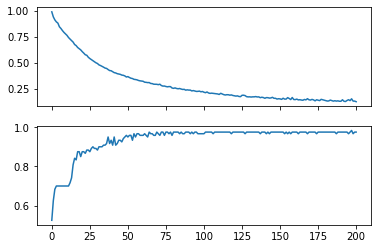

In [143]:
fig, axes = plt.subplots(2, sharex=True)


axes[0].plot(train_loss_results)
axes[1].plot(train_accuracy_results)

In [202]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url,
                                 )

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [203]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size=batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [204]:
test_accuracy = tf.keras.metrics.Accuracy()

for x, y in test_dataset:
    logits = model(x, training=False)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(y_true=y, y_pred=prediction)
    
print("Accuracy: {}".format(test_accuracy.result()))

Accuracy: 1.0
